# VD 1:


## a) Tự xây dựng các bước
sẽ dung phương pháp giải bài toán Lagrange đối ngẫu $g(\lamda)$ để tìm $\lamda$, sau đó
thay vào tính w và w0 (bám theo công thức được xây dựng trong phần lý thuyết)

In [16]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)  # class 1
X1 = np.random.multivariate_normal(means[1], cov, N)  # class -1

In [17]:
X = np.concatenate((X0.T, X1.T), axis=1)  # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)  # labels

In [18]:
X.shape

(2, 200)

In [19]:
X

array([[1.17426551, 2.77457483, 1.85034804, 1.84297202, 2.03689608,
        1.51447957, 2.25260376, 1.78614914, 2.53808358, 1.49918321,
        3.37869404, 1.33367001, 1.06414468, 1.6378239 , 1.99850737,
        2.25648782, 2.04011444, 1.30215716, 1.87539189, 1.53543722,
        1.74834156, 2.57913581, 2.44985621, 2.0997668 , 1.75038784,
        1.94830924, 2.11159014, 1.53336558, 0.59749811, 2.13712225,
        2.22828112, 1.59164249, 2.15891529, 1.79410734, 2.20850853,
        1.73726077, 1.88673162, 1.29083956, 2.61539022, 2.70100647,
        0.6173054 , 2.97790645, 2.50958924, 1.93646149, 2.33732743,
        1.39146419, 2.19953161, 1.43868927, 2.22101417, 2.02354288,
        2.3677825 , 2.35641502, 2.16165704, 1.95832672, 1.82262346,
        1.95880534, 0.96316239, 2.23442675, 2.18796127, 2.22539876,
        2.58181773, 0.83063389, 1.23096381, 1.45144204, 1.02229703,
        2.36754865, 2.24980666, 2.66251244, 1.32348299, 0.68371106,
        2.44776579, 2.13152798, 1.45013086, 2.64

In [20]:
y.shape


(1, 200)

In [21]:
y

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.

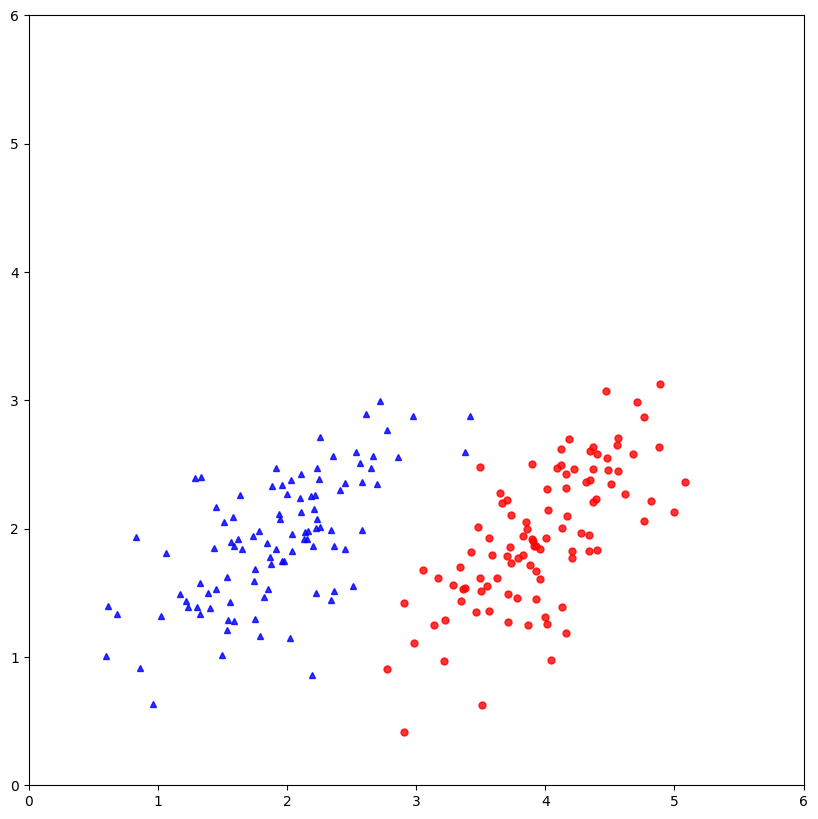

In [22]:
# hiển thị dữ liệu
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
# plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize=5, alpha=.8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize=5, alpha=.8)
ani = plt.axis([0, 6, 0, 6])
plt.show()

In [23]:
from cvxopt import matrix, solvers

# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis=1)
P = matrix(V.T.dot(V))  # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1)))  # all-one vector

# build A, b, G, h
# for all lambda_n >= 0! note that we solve -g(lambda) -> min
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y)  # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x'])  # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [24]:
# cần loại bỏ các giá trị lambda quá nhỏ trong kết quả (thực chất đó là 0 nhưng phương pháp giải lặp có sai số tính toán).

epsilon = 1e-6  # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w_1 = VS.dot(lS)
w0_1 = np.mean(yS.T - w_1.T.dot(XS))
print('W = ', w_1.T)
print('W0 = ', w0_1)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859321018


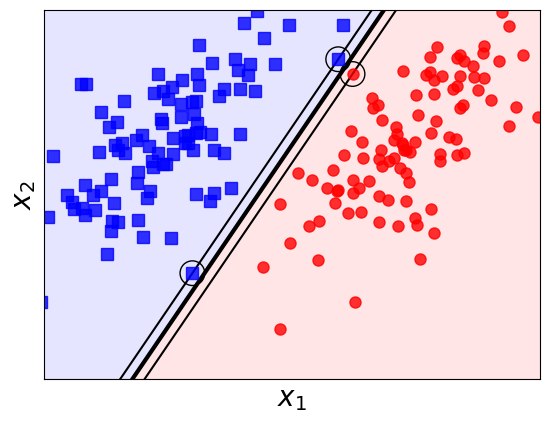

In [26]:
# draw
# plot points
fig, ax = plt.subplots()
x1 = np.arange(-10, 10, 0.1)
y1 = -w_1[0, 0]/w_1[1, 0]*x1 - w0_1/w_1[1, 0]
y2 = -w_1[0, 0]/w_1[1, 0]*x1 - (w0_1-1)/w_1[1, 0]
y3 = -w_1[0, 0]/w_1[1, 0]*x1 - (w0_1+1)/w_1[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')
y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

# plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
# pdf.savefig()
plt.show()

## b) Sử dụng thư viện:

In [33]:
from sklearn.svm import SVC
# Copy and put code for generate data here

y1 = y.reshape((2*N,))
X1 = X.T  # each sample is one row
clf = SVC(kernel='linear', C=1e5)  # just a big number

# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w_2 = clf.coef_
w0_2 = clf.intercept_
print('w = ', w_2)
print('W0 = ', w0_2)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


## Nhận xét: 2 bộ trọng số thu được có kết quả tương đối giống nhau.

# Bài tập thực hành 1:
Xem lại các bài ví dụ phần trước, sử dụng bộ trọng số W đã tính được và dự đoán
các phân lớp y ứng với dữ liệu X trên chính tập dữ liệu ngẫu nhiên vừa tạo. Đưa ra độ chính xác Accuracy
và ma trận nhầm lẫn Confusion Matrix.


In [ ]:
def predict(X, w, b):
    return np.sign(np.dot(w.T, X) + b).flatten()

## Su dung bo trong so thu 1

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán phân lớp
y_pred_1 = predict(X, w_1, w0_1)

# Tính độ chính xác
accuracy_1 = accuracy_score(y.flatten(), y_pred_1)

# Tạo ma trận nhầm lẫn
conf_matrix_1 = confusion_matrix(y.flatten(), y_pred_1)

print("Accuracy:", accuracy_1)
print("Confusion Matrix:")
print(conf_matrix_1)

Accuracy: 1.0
Confusion Matrix:
[[100   0]
 [  0 100]]


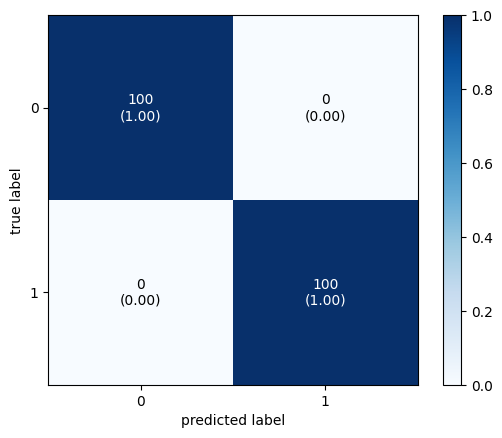

In [31]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_1,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Su dung bo trong so thu 2

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán phân lớp
y_pred_2 = predict(X, w_2.T, w0_2)

# Tính độ chính xác
accuracy_2 = accuracy_score(y.flatten(), y_pred_2)

# Tạo ma trận nhầm lẫn
conf_matrix_2 = confusion_matrix(y.flatten(), y_pred_2)

print("Accuracy:", accuracy_2)
print("Confusion Matrix:")
print(conf_matrix_2)

Accuracy: 1.0
Confusion Matrix:
[[100   0]
 [  0 100]]


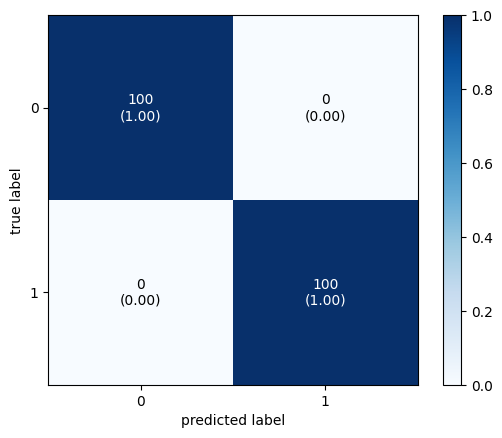

In [36]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_2,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Ví dụ 2 (Bài tập tự giải):

In [37]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

# data (as pandas dataframes)
X = connectionist_bench_sonar_mines_vs_rocks.data.features
y = connectionist_bench_sonar_mines_vs_rocks.data.targets

print(X.shape)
print(y.shape)

(208, 60)
(208, 1)


In [38]:
print(X)

     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0        0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1        0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2        0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3        0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4        0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   
..          ...         ...         ...         ...         ...         ...   
203      0.0187      0.0346      0.0168      0.0177      0.0393      0.1630   
204      0.0323      0.0101      0.0298      0.0564      0.0760      0.0958   
205      0.0522      0.0437      0.0180      0.0292      0.0351      0.1171   
206      0.0303      0.0353      0.0490      0.0608      0.0167      0.1354   
207      0.0260      0.0363      0.0136      0.0272      0.0214      0.0338   

     Attribute7  Attribute8  Attribute9  Attribute1

In [39]:
print(y)

    class
0       R
1       R
2       R
3       R
4       R
..    ...
203     M
204     M
205     M
206     M
207     M

[208 rows x 1 columns]


In [40]:
# chuyển label M thành 1, R thành -1
y = y.replace({'M': 1, 'R': -1})
y

C:\Users\Admin\AppData\Local\Temp\ipykernel_21204\2584001847.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'R': -1})


,class
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
203,1
204,1
205,1
206,1


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM với soft margin, huấn luyện mô hình
svm_model = SVC(kernel='linear', C=1000)
svm_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình SVM là:", accuracy)

Độ chính xác của mô hình SVM là: 0.7857142857142857


e:\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Tạo mô hình SVM với soft margin, huấn luyện mô hình
svm_model = SVC(kernel='linear', C=5000) # C=3000, 4000
svm_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình SVM là:", accuracy)

e:\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Độ chính xác của mô hình SVM là: 0.8095238095238095


In [49]:
# Tạo mô hình SVM với soft margin, huấn luyện mô hình
svm_model = SVC(kernel='linear', C=6000)  # C = 7000, 8000, 9000, 10000
svm_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình bằng độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình SVM là:", accuracy)

e:\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Độ chính xác của mô hình SVM là: 0.8333333333333334


## Nhận xét
Khi giá trị của C tăng lên từ 1000 đến 5000, độ chính xác của mô hình tăng lên từ 0.786 lên 0.810. Điều này có thể xảy ra khi giá trị của C tăng, mô hình trở nên có độ nghiêm ngặt hơn đối với việc phân loại dữ liệu huấn luyện. 
Khi C tăng từ 6000 trở lên  thì độc chính xác tiếp tục tăng lên đến 0.8333333333333334.
Khi giá trị của C càng lớn, mô hình SVM trở nên càng nghiêm ngặt hơn đối với việc phân loại dữ liệu huấn luyện. Điều này có thể giúp mô hình tìm ra các ranh giới quyết định (decision boundary) tốt hơn giữa các lớp dữ liệu, đồng thời giảm thiểu sự chồng lắp (overfitting) trên tập huấn luyện.
Tuy nhiên, khi C quá lớn, thì mô hình có thể mất đi khả năng tổng quát hóa trên dữ liệu mới.